In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [34]:
ticker = 'GOOG'
start_date = '2018-01-01'
end_date = '2023-12-20'

In [35]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000
...,...,...,...,...,...,...,...
1497,2023-12-13,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
1498,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
1499,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
1500,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [36]:
close = df['Close']

In [37]:
print(close.values)

[ 53.25        54.12400055  54.31999969 ... 133.83999634 137.19000244
 138.1000061 ]


In [38]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.04356316],
       [0.05214037],
       [0.05406386],
       ...,
       [0.83445206],
       [0.86732814],
       [0.87625867]])

In [39]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1201, 1), (301, 1))

In [40]:
test_data[20]

array([0.39096941])

In [41]:
past_values = 20
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)):
        X.append(data[i-20:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [42]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [43]:
X_train, y_train

(array([[[0.04356316],
         [0.05214037],
         [0.05406386],
         ...,
         [0.09795088],
         [0.0978233 ],
         [0.09198906]],
 
        [[0.05214037],
         [0.05406386],
         [0.06183143],
         ...,
         [0.0978233 ],
         [0.09198906],
         [0.09505585]],
 
        [[0.05406386],
         [0.06183143],
         [0.06414257],
         ...,
         [0.09198906],
         [0.09505585],
         [0.09395668]],
 
        ...,
 
        [[0.60520327],
         [0.59480066],
         [0.61796109],
         ...,
         [0.46457243],
         [0.49548571],
         [0.52600643]],
 
        [[0.59480066],
         [0.61796109],
         [0.61884436],
         ...,
         [0.49548571],
         [0.52600643],
         [0.5241418 ]],
 
        [[0.61796109],
         [0.61884436],
         [0.55446621],
         ...,
         [0.52600643],
         [0.5241418 ],
         [0.52433804]]]),
 array([[0.09505585],
        [0.09395668],
        [0.

In [44]:
X_train.shape, y_train.shape

((1181, 20, 1), (1181, 1))

In [45]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0
# )
# model.fit(X_train, y_train, batch_size=200, epochs=500, verbose=1, callbacks=[callback])

Epoch 1/200
6/6 [==============================] - 11s 108ms/step - loss: 0.1019
Epoch 2/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0245
Epoch 3/200
6/6 [==============================] - 1s 102ms/step - loss: 0.0166
Epoch 4/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0060
Epoch 5/200
6/6 [==============================] - 1s 96ms/step - loss: 0.0037
Epoch 6/200
6/6 [==============================] - 1s 102ms/step - loss: 0.0034
Epoch 7/200
6/6 [==============================] - 1s 99ms/step - loss: 0.0024
Epoch 8/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0018
Epoch 9/200
6/6 [==============================] - 1s 97ms/step - loss: 0.0017
Epoch 10/200
6/6 [==============================] - 1s 102ms/step - loss: 0.0017
Epoch 11/200
6/6 [==============================] - 1s 93ms/step - loss: 0.0017
Epoch 12/200
6/6 [==============================] - 1s 92ms/step - loss: 0.0016
Epoch 13/200
6/6 [==========================

Epoch 103/200
6/6 [==============================] - 1s 148ms/step - loss: 9.5999e-04
Epoch 104/200
6/6 [==============================] - 1s 115ms/step - loss: 9.7825e-04
Epoch 105/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0010
Epoch 106/200
6/6 [==============================] - 1s 97ms/step - loss: 0.0010
Epoch 107/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0010
Epoch 108/200
6/6 [==============================] - 1s 121ms/step - loss: 0.0010
Epoch 109/200
6/6 [==============================] - 1s 111ms/step - loss: 0.0011
Epoch 110/200
6/6 [==============================] - 1s 110ms/step - loss: 0.0011
Epoch 111/200
6/6 [==============================] - 1s 107ms/step - loss: 0.0011
Epoch 112/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0011
Epoch 113/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0011
Epoch 114/200
6/6 [==============================] - 1s 100ms/step - loss: 9.7884e-04
Epoch 115

6/6 [==============================] - 1s 85ms/step - loss: 7.1729e-04
Epoch 200/200
6/6 [==============================] - 1s 89ms/step - loss: 7.3410e-04


In [50]:
pred_train = model.predict(X_train)

37/37 [==============================] - 1s 17ms/step


In [51]:
pred_train

array([[0.0947403 ],
       [0.09620811],
       [0.09693819],
       ...,
       [0.4824124 ],
       [0.48905593],
       [0.49753293]], dtype=float32)

In [52]:
mae = mean_absolute_error(y_train, pred_train)
print('mean absolute error-', mae)
mse = mean_squared_error(y_train, pred_train)
print('mean squared error-', mse)

mean absolute error- 0.02016549567741683
mean squared error- 0.0007487371286118839


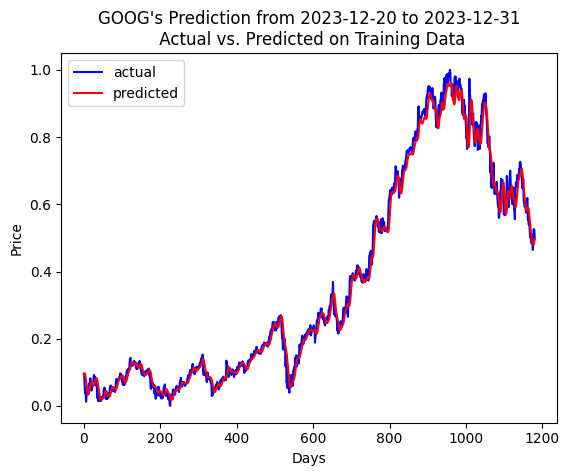

In [53]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_train, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [54]:
pred_test = model.predict(X_test)

9/9 [==============================] - 0s 13ms/step


In [55]:
mae = mean_absolute_error(y_test, pred_test)
print('mean absolute error-', mae)
mse = mean_squared_error(y_test, pred_test)
print('mean squared error-', mse)

mean absolute error- 0.029597203519845326
mean squared error- 0.0014591862347044283


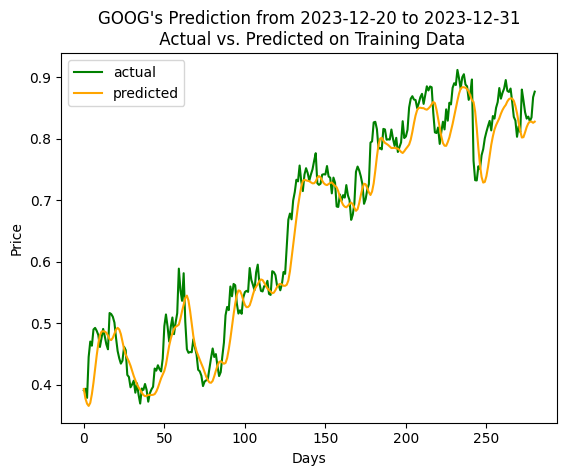

In [56]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(y_test, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [69]:
ticker = 'GOOG'
start_date = '2023-12-20'
end_date = '2023-12-31'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0    139.660004
1    141.800003
2    142.720001
3    142.820007
4    141.440002
5    141.279999
6    140.929993
Name: Close, dtype: float64

In [70]:
df_future = df_future.values

In [71]:
future_data_to_predict = np.array(close[-20:])
future_data_to_predict

array([138.61999512, 140.02000427, 138.22000122, 138.05000305,
       138.61999512, 136.3999939 , 133.91999817, 133.32000732,
       130.63000488, 132.38999939, 131.42999268, 138.44999695,
       136.63999939, 134.69999695, 133.63999939, 133.97000122,
       133.19999695, 133.83999634, 137.19000244, 138.1000061 ])

In [72]:
last_val = future_data_to_predict[-1]
last_val

138.10000610351562

---------------------------------------------------------------------------------------------------------------------------

In [73]:
def prediction(future_data, last_val, days):
    
    output_data = []
    new_arr = []

    for i in range(days):
        
        if future_data[-1] == last_val:
            print('no')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)
        else:
            print('yes')
            print('before',future_data)
            temp = scaler.transform(future_data.reshape(-1, 1))
            temp_scaled_reshape = temp.reshape(1, 20, 1)
            predicted_value = model.predict(temp_scaled_reshape)
            actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
            output_data.append(actual_predicted[0,0])
            print('output',actual_predicted[0,0])
            future_data = future_data[1:]
            future_data = np.append(future_data,actual_predicted)
            print('after',future_data)

    return output_data
    

In [74]:
result = prediction(future_data_to_predict[-20:], last_val, len(df_future))
result

no
before [138.61999512 140.02000427 138.22000122 138.05000305 138.61999512
 136.3999939  133.91999817 133.32000732 130.63000488 132.38999939
 131.42999268 138.44999695 136.63999939 134.69999695 133.63999939
 133.97000122 133.19999695 133.83999634 137.19000244 138.1000061 ]
1/1 [==============================] - 0s 39ms/step
output 133.72401
after [140.02000427 138.22000122 138.05000305 138.61999512 136.3999939
 133.91999817 133.32000732 130.63000488 132.38999939 131.42999268
 138.44999695 136.63999939 134.69999695 133.63999939 133.97000122
 133.19999695 133.83999634 137.19000244 138.1000061  133.72401428]
yes
before [140.02000427 138.22000122 138.05000305 138.61999512 136.3999939
 133.91999817 133.32000732 130.63000488 132.38999939 131.42999268
 138.44999695 136.63999939 134.69999695 133.63999939 133.97000122
 133.19999695 133.83999634 137.19000244 138.1000061  133.72401428]
1/1 [==============================] - 0s 42ms/step
output 133.98206
after [138.22000122 138.05000305 138.61999

[133.72401, 133.98206, 133.89178, 133.57965, 133.11848, 132.5666, 131.99638]

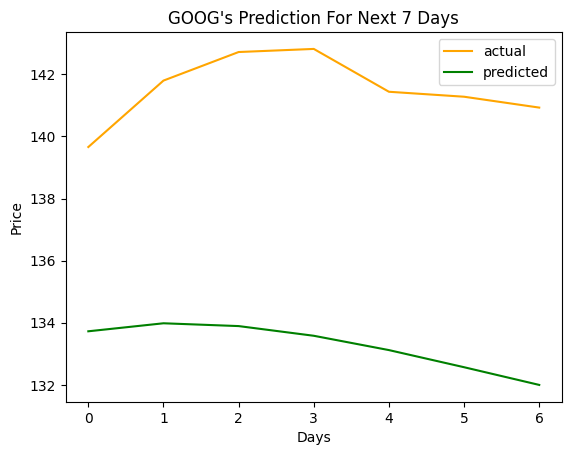

In [76]:
plt.title(f"{ticker}'s Prediction For Next {len(df_future)} Days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_future, color='orange', label='actual')
plt.plot(result, color='green', label='predicted')
plt.legend()

In [138]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    print("*******************",np.where(controls))
    
#     inds = np.where(controls)[0]
#     print(inds)
#     buy_inds = np.where(controls>0)[0]
#     sell_inds = np.where(controls<0)[0]
#     max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
#     for i in range(buy_inds[0]+2):
#         inv.append(curr_val)
#     for i in range(buy_inds[0],max_limit+1):
#         if controls[i]>0:
#             buy_val = val[i+1]
#         elif controls[i]<0:
#             sell_val = val[i+1]
#             curr_val = curr_val*sell_val/buy_val
#         inv.append(curr_val)
        
#     if max_limit+1!=len(controls):
#         for i in range(len(controls)-max_limit-1):
#             inv.append(curr_val)
#     return inv

In [139]:
# controls_actual = get_control_vector(df_future)
# amount_actual = buy_and_sell_bot(future_data, controls_actual)
# controls_actual,amount_actual

In [156]:
controls_pred= get_control_vector(np.array(result))
# amount_pred = buy_and_sell_bot(result, controls_pred)
# amount_pred,
np.sign(np.diff(np.array(result))), np.sign(np.diff(df_future))

(array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([ 1., -1., -1., -1.,  1., -1.]))

In [154]:
df_future

array([152.11999512, 153.83999634, 153.41999817, 153.41000366,
       153.33999634, 153.38000488, 151.94000244])

In [155]:
result = np.array(result)
result

array([153.55403, 154.67691, 155.34634, 155.79456, 156.12683, 156.38371,
       156.59152], dtype=float32)